In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/MyDrive/Uwith_hack/
!ls
!unzip data.zip

In [ ]:
!pip install ultralytics==8.*

In [ ]:
#학습 코드
from ultralytics import YOLO

# 1. 모델 불러오기 (사전 학습된 YOLOv8n)
model = YOLO("yolov8n.pt")  # 가장 가벼운 YOLO 모델

# 2. 학습 실행
model.train(
    data="/content/drive/MyDrive/Uwith_hack/data/data.yaml",  # ← 이 경로는 실제 파일 경로에 맞춰 수정 가능
    epochs=50,
    imgsz=512,
    batch=16,
    name="test1_yolov8n",
    device=0 # GPU 사용
)

# 사전 test 결과
팀명   :  mAP90     mAP95
chan1 :   0.464      0.198
chan2 :   0.464      0.198

elsa1 :   0.464      0.198
elsa2 :   0.464      0.198

anna1 :   0.193     0.0735
anna2 :   0.433      0.179
anna3 :   0.458      0.198

olaf1 :   0.433      0.179
olaf2 :   0.441      0.188
olaf3 :   0.422      0.171


Total images found: 5 (Showing first 5)

Detecting: country1_001017.jpg

image 1/1 /content/drive/MyDrive/Uwith_hack/data/data/test/images/country1_001017.jpg: 512x512 1 AlligatorCrack, 7.1ms
Speed: 2.6ms preprocess, 7.1ms inference, 2.0ms postprocess per image at shape (1, 3, 512, 512)


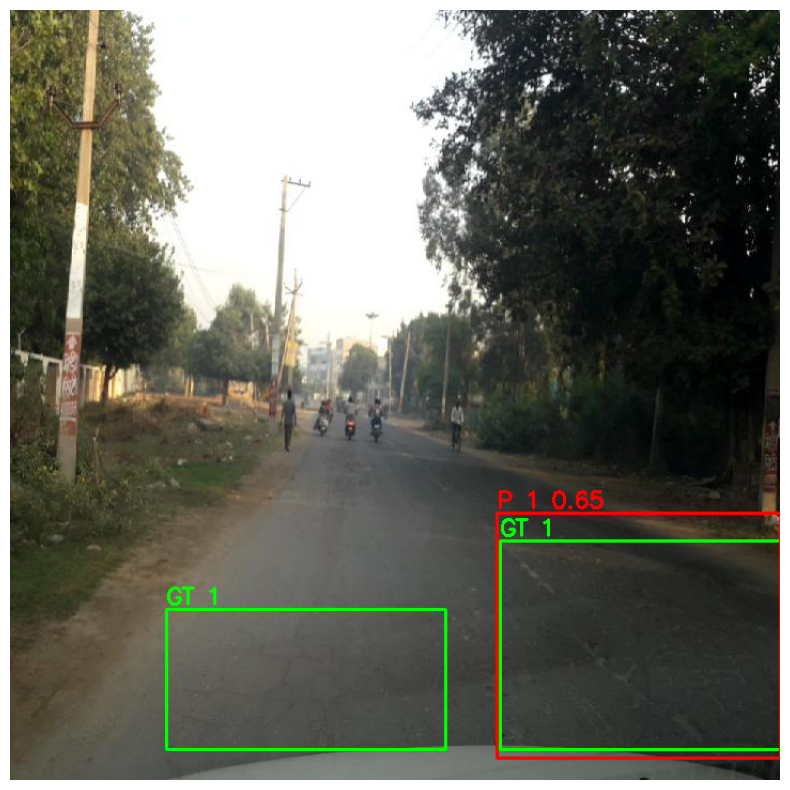


Detecting: country1_001135.jpg

image 1/1 /content/drive/MyDrive/Uwith_hack/data/data/test/images/country1_001135.jpg: 512x512 3 Potholes, 10.3ms
Speed: 3.1ms preprocess, 10.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


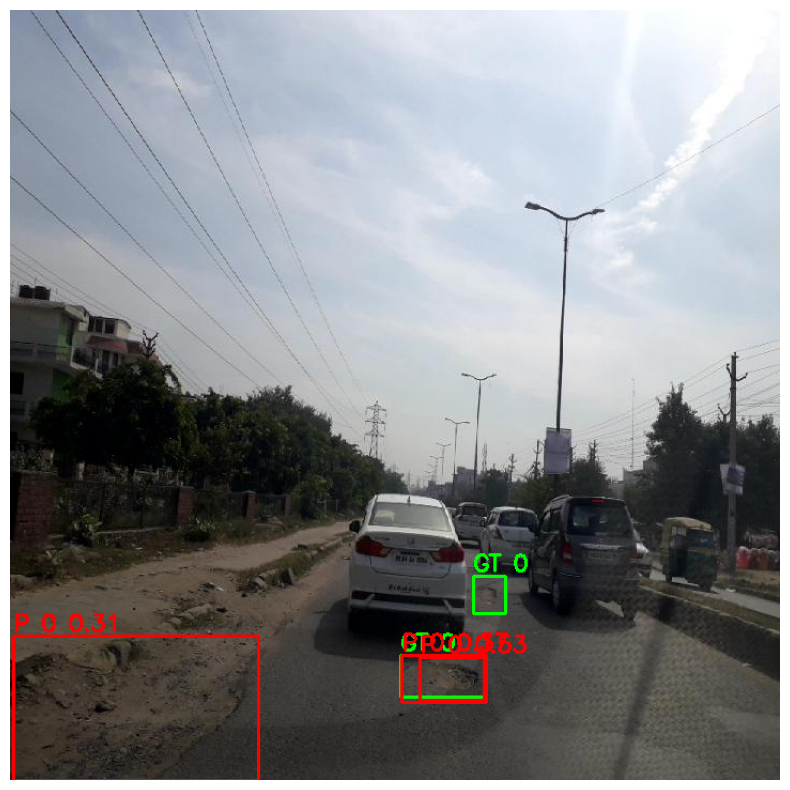


Detecting: country1_001137.jpg

image 1/1 /content/drive/MyDrive/Uwith_hack/data/data/test/images/country1_001137.jpg: 512x512 4 Potholes, 11.9ms
Speed: 3.0ms preprocess, 11.9ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


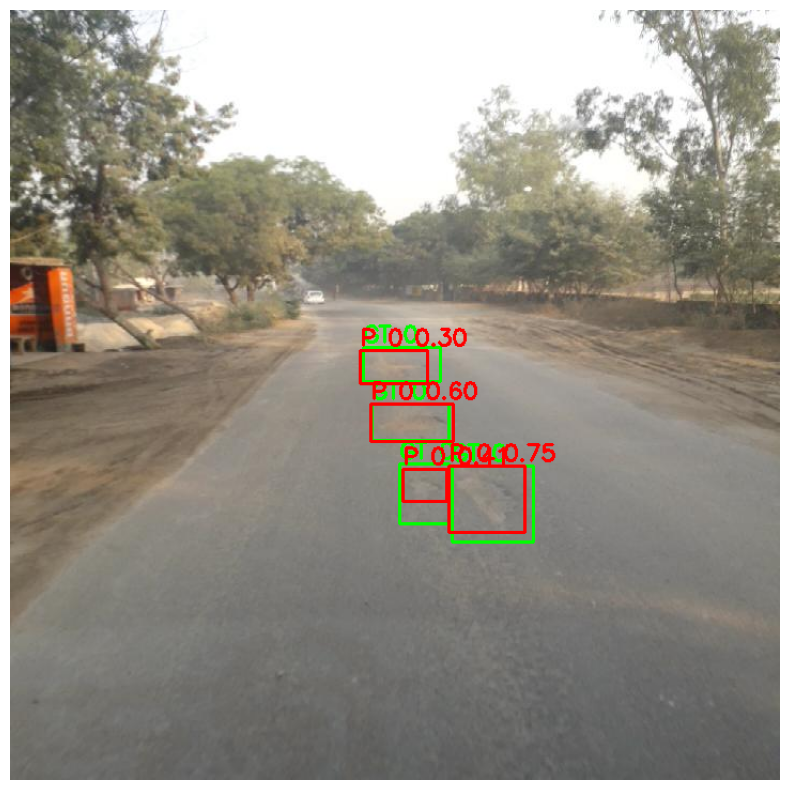


Detecting: country1_001160.jpg

image 1/1 /content/drive/MyDrive/Uwith_hack/data/data/test/images/country1_001160.jpg: 512x512 1 LongitudinalCrack, 9.3ms
Speed: 3.2ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 512, 512)


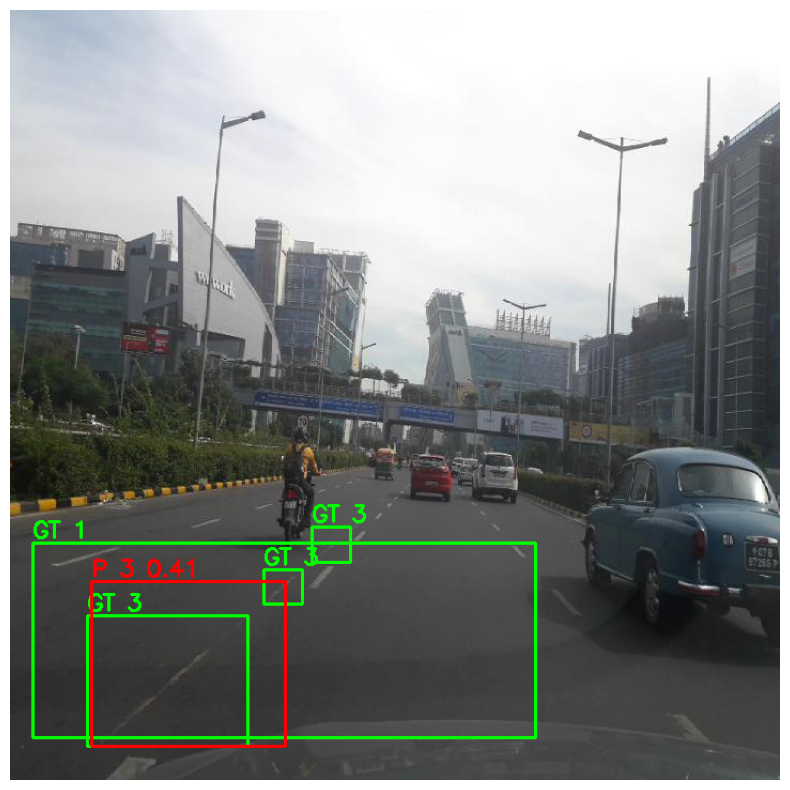


Detecting: country1_001173.jpg

image 1/1 /content/drive/MyDrive/Uwith_hack/data/data/test/images/country1_001173.jpg: 512x512 1 Pothole, 10.9ms
Speed: 3.9ms preprocess, 10.9ms inference, 1.7ms postprocess per image at shape (1, 3, 512, 512)


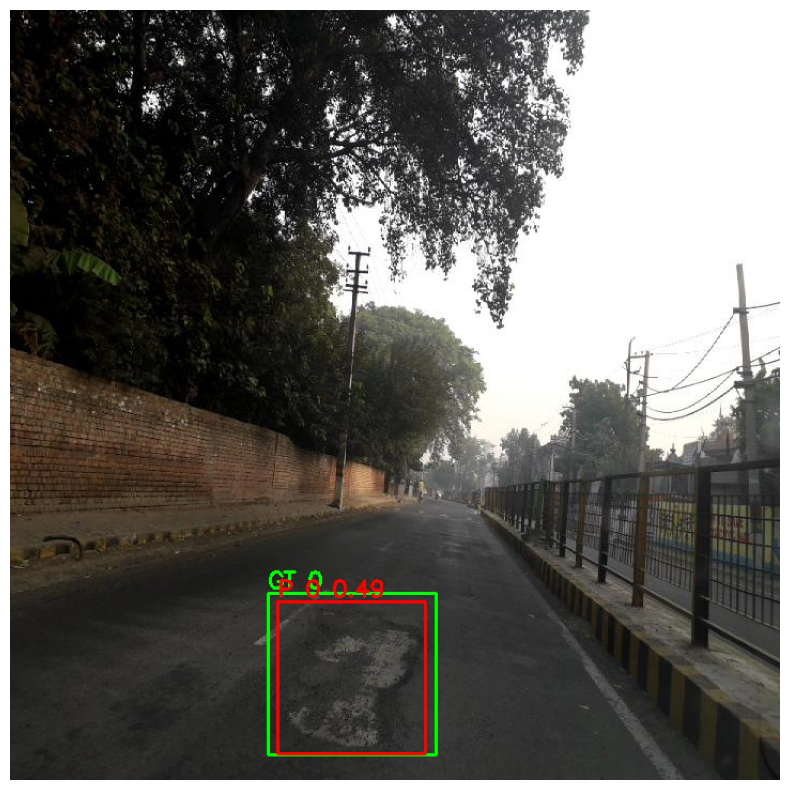

In [ ]:
#테스트 데이터셋 기반 결과 시각화

from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os

model = YOLO("/content/drive/MyDrive/Uwith_hack/elsa_final.pt")

# 데이터셋
IMG_DIR = "/content/drive/MyDrive/Uwith_hack/data/data/test/images"
LBL_DIR = "/content/drive/MyDrive/Uwith_hack/data/data/test/labels"

MAX_SHOW = 5


# 라벨 읽기
def load_gt_labels(label_path):
    gt_boxes = []
    if not os.path.exists(label_path):
        return gt_boxes

    with open(label_path, "r") as f:
        for line in f:
            cls, cx, cy, w, h = map(float, line.strip().split())
            gt_boxes.append((int(cls), cx, cy, w, h))
    return gt_boxes

# bbox
def yolo_to_xyxy(cx, cy, w, h, img_w, img_h):
    x1 = int((cx - w/2) * img_w)
    y1 = int((cy - h/2) * img_h)
    x2 = int((cx + w/2) * img_w)
    y2 = int((cy + h/2) * img_h)
    return x1, y1, x2, y2


# 시각화
def show_gt_and_pred(img_path, results):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w = img.shape[:2]

    # 답(초록)
    base = os.path.basename(img_path).split(".")[0]
    label_path = os.path.join(LBL_DIR, base + ".txt")
    gt_boxes = load_gt_labels(label_path)

    for cls, cx, cy, bw, bh in gt_boxes:
        x1, y1, x2, y2 = yolo_to_xyxy(cx, cy, bw, bh, w, h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        cv2.putText(img, f"GT {int(cls)}", (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)

    # 예측(레드)
    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 2)
        cv2.putText(img, f"P {cls} {conf:.2f}",
                    (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,0), 2)
    plt.figure(figsize=(10, 10))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


img_files = sorted([
    os.path.join(IMG_DIR, f) for f in os.listdir(IMG_DIR)
    if f.lower().endswith((".jpg", ".png"))
])[:MAX_SHOW]

print(f"Total images found: {len(img_files)} (Showing first {MAX_SHOW})")

for img_path in img_files:
    print(f"\nDetecting: {os.path.basename(img_path)}")
    results = model(img_path)
    show_gt_and_pred(img_path, results)


In [ ]:
from ultralytics import YOLO
import numpy as np

model = YOLO("yolov8n.pt")
#model = YOLO("/content/drive/MyDrive/Uwith_hack/chan_final.pt") 
model = YOLO("/content/drive/MyDrive/Uwith_hack/elsa_final.pt")  

# test 데이터 기반 검증
metrics = model.val(data="/content/drive/MyDrive/Uwith_hack/data/data.yaml")


P = metrics.box.p      # Precision 
R = metrics.box.r      # Recall
F1 = metrics.box.f1    # F1-score 

names = model.names

print("\n===== F1-score per class =====")
for cls_id, cls_name in names.items():
    print(f"{cls_name:20s} | F1 = {F1[cls_id]:.4f}")

#f1 평균
mean_f1 = float(np.mean(F1))
print("\n===== Mean F1-score =====")
print(f"Mean F1 = {mean_f1:.4f}")


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,428 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.4±0.1 ms, read: 83.4±82.6 MB/s, size: 123.2 KB)
val: Scanning /content/drive/MyDrive/Uwith_hack/data/data/test_f/labels.cache... 296 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 296/296 331.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 19/19 3.9it/s 4.9s
                   all        296        851      0.646      0.656      0.692      0.378
               Pothole         54         88      0.615      0.544      0.595      0.281
        AlligatorCrack        129        164      0.719      0.707      0.784      0.477
       TransverseCrack        202        312      0.626      0.679      0.688      0.341
     LongitudinalCrack        171        287      0.624      0.693      0.702      0.414
Speed: 1.9ms preproces